In [1]:
from models.SklearnClassifier import SklearnClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import utils
import time
from Embeddings import Embeddings
from pprint import pprint

# Create the embeddings object
embeddings = Embeddings('../data/doc2vec.npy', '../data/bert.npy', '../data/authors.npy', '../data/authors_encoded.npy', '../pickles/author_encoder.pkl')

In [2]:
def run_random_forest(X, y, figure_title, scale_features=True):
    if scale_features:
        X = utils.scale_feature_matrix(X)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Find the best hyperparameters
    params = {
        'n_estimators': [10, 50, 100, 200, 500],
        'max_depth': [None, 10, 50, 100, 200],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': [None, 'sqrt', 'log2']
    }
    
    clf = SklearnClassifier(RandomForestClassifier(n_jobs=-1))
    # Find the best hyperparameters
    start = time.time()
    clf.hyperparameter_tuning(X_train, y_train, params)
    print('Hyperparameter tuning and training time: ', time.time() - start)
    # Print the best hyperparameters
    print('Best hyperparameters: ', clf.get_best_hyperparams())
    
    # Evaluate the model
    pprint(clf.evaluate(X_test, y_test))
    
    # Get the confusion matrix
    clf.get_confusion_matrix(X_test, y_test, figure_title)

In [3]:
# Load the feature matrix and labels
X = embeddings.get_doc2vec()
y = embeddings.get_labels()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Hyperparameter tuning and training time:  158.6349802017212
Best hyperparameters:  {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


/home/pogrebitskiy.d/miniconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Accuracy': 0.5039696237487056,
 'F1': 0.45418234038993854,
 'Precision': 0.5452966283026234,
 'Recall': 0.5039696237487056}


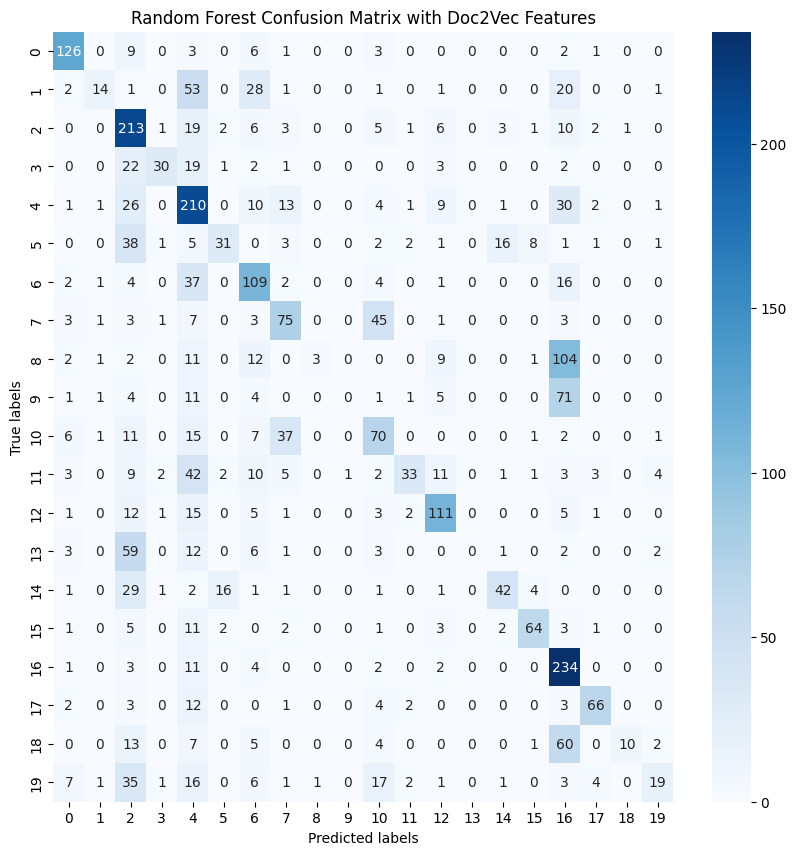

In [4]:
# Run the random forest classifier with Doc2Vec features
run_random_forest(X, y, 'Random Forest Confusion Matrix with Doc2Vec Features', scale_features=True)

In [5]:
# Load the feature matrix and labels for BERT
X = embeddings.get_bert()
y = embeddings.get_labels()

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  12.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  41.8s
[CV] END max_depth=50, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=  14.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  43.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  12.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  43.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  11.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estima

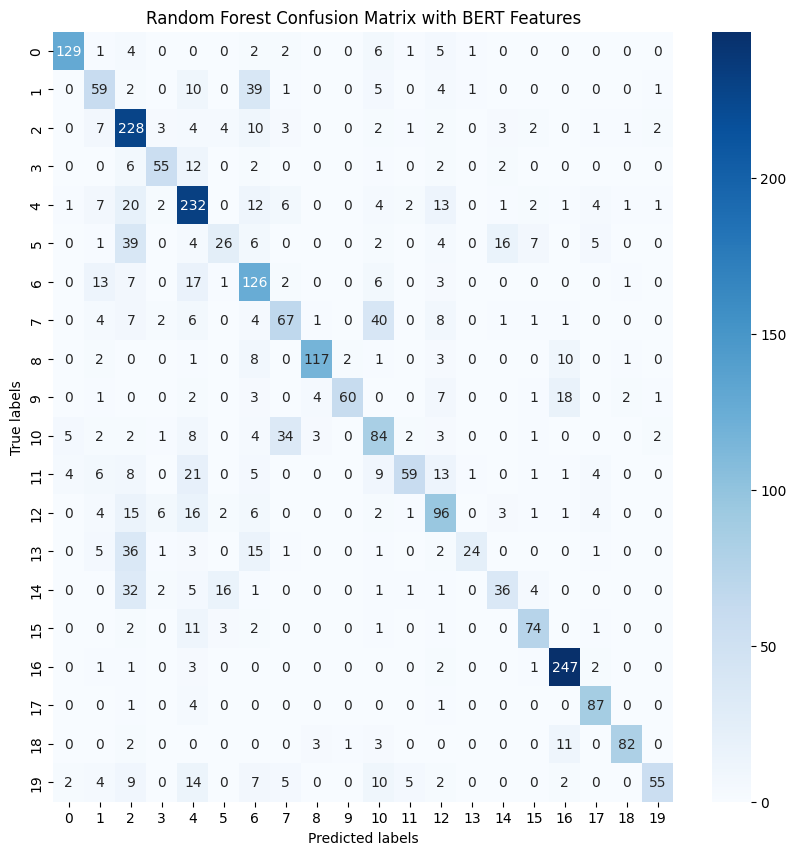

In [6]:
# Run the random forest classifier with BERT features
run_random_forest(X, y, 'Random Forest Confusion Matrix with BERT Features', scale_features=False)